<a href="https://colab.research.google.com/github/chayhuixiang/tensorflow-starter/blob/main/6%20-%20Convolutional%20Neural%20Networks%20-%20CNNs/4_CNN_on_Real_Image_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading the data

In [ ]:
!gdown --id 1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb
To: /content/cell_images.zip
100% 354M/354M [00:02<00:00, 136MB/s]


In [ ]:
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_245.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_251.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_261.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_41.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_57.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_85.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_104.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_109.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_128.png  
 extracting: cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_142.pn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [ ]:
from matplotlib.image import imread

In [ ]:
test_path = '/content/cell_images/test'
train_path = '/content/cell_images/train'

In [ ]:
os.listdir(train_path+'/parasitized')[0]

'C136P97ThinF_IMG_20151005_141321_cell_97.png'

In [ ]:
para_cell = train_path+'/parasitized'+'/C136P97ThinF_IMG_20151005_141321_cell_97.png'

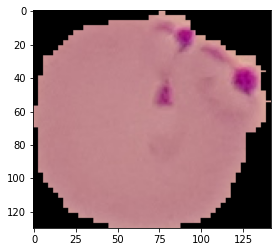

In [ ]:
plt.imshow(imread(para_cell))

In [ ]:
os.listdir(train_path+'/uninfected')[0]

'C141P102ThinF_IMG_20151005_214615_cell_85.png'

In [ ]:
uninfected_cell = train_path+'/uninfected'+'/C141P102ThinF_IMG_20151005_214615_cell_85.png'

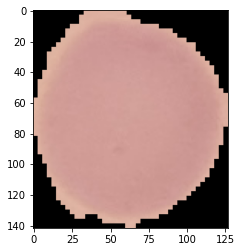

In [ ]:
plt.imshow(imread(uninfected_cell))

# Data Processing

In [ ]:
print(imread(uninfected_cell).shape)
print(imread(para_cell).shape)

(142, 127, 3)
(130, 142, 3)


In [ ]:
# Both parasitised and uninfected have the same number of images
len(os.listdir(train_path+'/parasitized'))

12480

In [ ]:
len(os.listdir(train_path+'/uninfected'))

12480

In [ ]:
# Dim1 and Dim2 will hold the height and the length of the images respectively
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
  img = imread(test_path+'/uninfected/'+image_filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


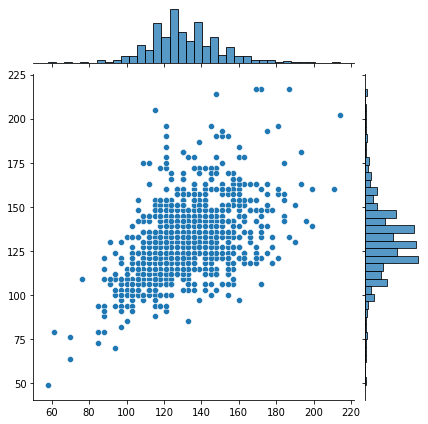

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

In [ ]:
# We will resize the images to 130 130
image_shape = (130,130,3)

In [ ]:
# Perform data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [ ]:
# Parameters determine data augmentation
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,rescale=None,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

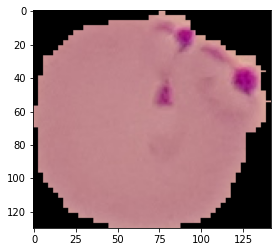

In [ ]:
para_image = imread(para_cell)
plt.imshow(para_image)

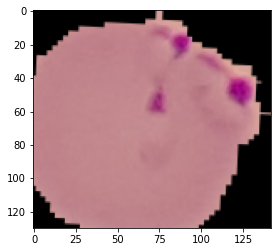

In [ ]:
plt.imshow(image_gen.random_transform(para_image))

## flow_from_directory
In order for us to use the image_gen, we have to organise our images in this file hierarchy

- Image Data Folder
  - Class 1
    - 0.jpg
    - 1.jpg
    - ...
  - Class 2
    - 0.jpg
    - 1.jpg
    - ...
  - ... 
  - Class n

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Dropout, Flatten

Link on how to model CNN

https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
batch_size=16

In [ ]:
# Reshape image as well under target_size
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary')

Found 24958 images belonging to 2 classes.


In [ ]:
# Note that shuffle=false for test images
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
1560/1560 [==============================] - 143s 84ms/step - loss: 0.8682 - accuracy: 0.5549 - val_loss: 0.6799 - val_accuracy: 0.5904
Epoch 2/20
1560/1560 [==============================] - 128s 82ms/step - loss: 0.6832 - accuracy: 0.5716 - val_loss: 0.6727 - val_accuracy: 0.5912
Epoch 3/20
1560/1560 [==============================] - 128s 82ms/step - loss: 0.6759 - accuracy: 0.5855 - val_loss: 0.6952 - val_accuracy: 0.5927


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Work 2022/Coding/Tensorflow/Section 6: Convolutional Neural Networks - CNNs/malaria_detector.h5')

In [ ]:
loaded_model.evaluate_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[34.917537689208984, 0.8773077130317688]

# Evaluating the model

In [ ]:
pred = loaded_model.predict_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
predictions = pred > 0.5

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.97      0.76      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [ ]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[1270   30]
 [ 313  987]]


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
my_image = image.load_img(para_cell,target_size=image_shape)

In [ ]:
my_image

In [ ]:
my_img_arr = image.img_to_array(my_image)

In [ ]:
my_img_arr.shape

(130, 130, 3)

In [ ]:
my_img_arr = np.expand_dims(my_img_arr,axis=0) # (1,130,130,3)

In [ ]:
loaded_model.predict(my_img_arr)

array([[0.7258007]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}